### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
df.shape

(669640, 2)

### Handle missing values

In [4]:
print(df['password'].isnull().sum())
print(df['strength'].isnull().sum())

1
0


In [5]:
df.dropna(inplace=True)
df.shape

(669639, 2)

### Visualiztion

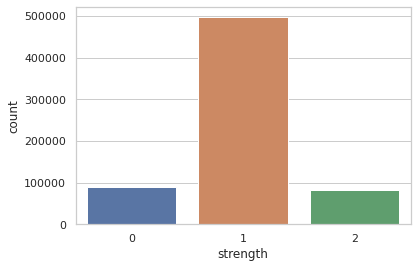

In [28]:
sns.set(style='whitegrid')
sns.countplot(x=df['strength'])

Medium strength password are much higher in number as compared to weak and strong passwords.

### Convert data to numpy array

In [6]:
data = np.array(df)
data

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### Shuffle data

In [7]:
import random
random.shuffle(data)
data

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kzde5577', 1],
       ...,
       ['a78965123a', 1],
       ['melani16', 1],
       ['pedro4348', 1]], dtype=object)

### Separate features and labels

In [8]:
x = [password[0] for password in data]
y = [password[1] for password in data]

### Tokenizing

In [9]:
def toCharList(password):
  lst = [char for char in password]
  return lst

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=toCharList)

In [11]:
X = vectorizer.fit_transform(x)

### Train and test splitting

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state = 42)

### Model building

In [18]:
import xgboost as xgb

In [24]:
xgb.__version__

'0.90'

In [26]:
classifier = xgb.XGBClassifier(n_jobs = -1)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
classifier.score(x_test, y_test)

0.914923978031338

### Save model to predict password strength in flask app

In [ ]:
import dill
dill.dump(classifier, open("classifier.pkl", "wb"))
dill.dump(vectorizer, open("vectorizer.pkl", "wb"))